## Philippine education data visualization

* python-readable data is available from [google drive](https://drive.google.com/drive/folders/0B51bsxa_NT6KLUFTcHRHNVZ0MEk)
* check if figures from tjpalanca's [article](http://www.tjpalanca.com/2014/04/data-primer-education.html) can be reproduced
* add new/alternative plots

In [1]:
!python --version

Python 2.7.13 :: Continuum Analytics, Inc.


In [5]:
import os
os.environ['CONDA_DEFAULT_ENV']

'astroconda'

In [10]:
from getpass import getuser

data_dir=os.path.join('/home',getuser(),'github/opendataph/education')

In [18]:
import pandas as pd

enrolment=pd.read_csv(os.path.join(data_dir,'enrolment.csv'), index_col=0)

/home/jp/miniconda2/envs/astroconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [47]:
enrolment.head()

,school.id,year,enrollment,grade,gender,national.cohort,school.cohort
1,101746,2012,52,Kinder,Male,7,1752.0
2,102193,2012,25,Kinder,Male,7,2199.0
3,101283,2012,14,Kinder,Male,7,1289.0
4,100216,2012,15,Kinder,Male,7,222.0
5,100043,2012,10,Kinder,Male,7,49.0


In [52]:
enrolment['year'].value_counts() #(by='year')

2014    604958
2015    604880
2013    603218
2012    598758
Name: year, dtype: int64

## enrolment per year

In [45]:
#alternatively
enrolment.groupby(by='year').count()['enrollment']

year
2012    598758
2013    603218
2014    604958
2015    604880
Name: enrollment, dtype: int64

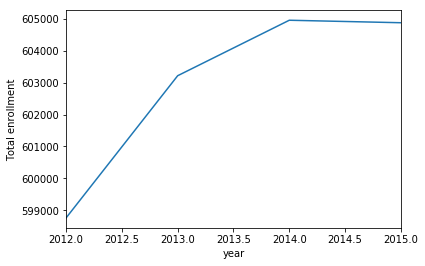

In [66]:
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

ax=enrolment.groupby(by='year').count()['enrollment'].plot()
ax.set_ylabel('Total enrollment')

In [76]:
for (year,year_group) in enrolment.groupby(by='year'):
    #0: year, 1: dataframe group
    print('{0}: {1}'.format(year,year_group.shape))

2012: (598758, 7)
2013: (603218, 7)
2014: (604958, 7)
2015: (604880, 7)


In [77]:
#male-female distribution per year
for (year,year_group) in enrolment.groupby(by='year'):
    #0: year, 1: dataframe group
    print('{0}\n{1}\n'.format(year,
                            year_group['gender'].value_counts()))

2012
Male      299379
Female    299379
Name: gender, dtype: int64

2013
Male      301609
Female    301609
Name: gender, dtype: int64

2014
Male      302479
Female    302479
Name: gender, dtype: int64

2015
Male      302440
Female    302440
Name: gender, dtype: int64



In [78]:
#2015
year_group.head()

,school.id,year,enrollment,grade,gender,national.cohort,school.cohort
115850,100001,2015,9,Kinder,Male,10,10.0
115851,100002,2015,41,Kinder,Male,10,11.0
115852,100003,2015,8,Kinder,Male,10,12.0
115853,100004,2015,8,Kinder,Male,10,13.0
115854,100005,2015,4,Kinder,Male,10,14.0


In [86]:
year_group['gender'].value_counts()

Male      302440
Female    302440
Name: gender, dtype: int64

In [71]:
grade_group['grade'].value_counts()

Grade 5              77296
Grade 4              77296
Grade 6              77296
Grade 1              77296
Grade 3              77296
Grade 2              77296
Kinder               77296
Year 1 / Grade 7     15952
Year 2 / Grade 8     15952
Year 3 / Grade 9     15952
Year 4 / Grade 10    15952
Name: grade, dtype: int64

In [85]:
for (grade,grade_group) in year_group.groupby('grade'):
    print('{0}\n{1}\n'.format(grade,
                    grade_group['gender'].value_counts()))

Grade 1
Female    38648
Male      38648
Name: gender, dtype: int64

Grade 2
Female    38648
Male      38648
Name: gender, dtype: int64

Grade 3
Female    38648
Male      38648
Name: gender, dtype: int64

Grade 4
Female    38648
Male      38648
Name: gender, dtype: int64

Grade 5
Female    38648
Male      38648
Name: gender, dtype: int64

Grade 6
Female    38648
Male      38648
Name: gender, dtype: int64

Kinder
Female    38648
Male      38648
Name: gender, dtype: int64

Year 1 / Grade 7
Female    7976
Male      7976
Name: gender, dtype: int64

Year 2 / Grade 8
Female    7976
Male      7976
Name: gender, dtype: int64

Year 3 / Grade 9
Female    7976
Male      7976
Name: gender, dtype: int64

Year 4 / Grade 10
Female    7976
Male      7976
Name: gender, dtype: int64



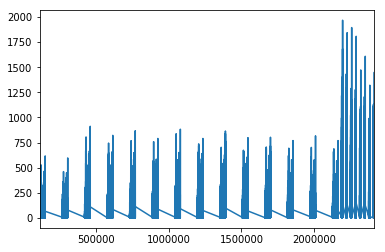

In [72]:
grade_group['enrollment'].plot()